# ALeRCE classes

https://github.com/ZwickyTransientFacility/ztf-avro-alert

1. **AGN:** Active Galactic Nuclei
1. **Blazar:** Blazar
1. **CV/Nova:** Cataclysmic Variable Star/Nova
1. **Ceph:** Cepheid Variable Star
1. **DSCT:** Delta Scuti Star
1. **EA:** Eclipsing Algol
1. **EB/EW:** Eclipsing Binaries/Eclipsing W Ursa Majoris
1. **LPV:** Long Period Variable
1. **Periodic-Other:** Periodic-Other
1. **QSO:** Quasi-Stellar Object
1. **RRL:** RRLyrae Variable Star
1. **RSCVn:** RS Canum Venaticorum
1. **SLSN:** Super Luminous Supernova
1. **SNII:** Supernova II
1. **SNIIb:** Supernova IIb
1. **SNIIn:** Supernova IIn
1. **SNIa:** Supernova Ia
1. **SNIbc:** Supernova Ibc
1. **TDE:** Tidal disruption event (to remove)
1. **YSO:** Young Stellar Object
1. **ZZ:** ZZ Ceti Stars (to remove)

In [1]:
import sys
sys.path.append('../../../')
sys.path.append('../../../../flaming-choripan')

In [2]:
%load_ext autoreload
%autoreload 2
from lchandler.survey_export.alerce_utils import process_df_labels, process_df_detections, keep_only_valid_objs
import numpy as np
import pandas as pd

load_rootdir = '/home/opimentel/tesis/surveys_data'
survey_name = 'alerceZTFv7.1'
uses_corr = 1 # uses_corr=False only can be used with SNe objects
df_index_names = {
    'oid':'oid', # object id
    'oid_det':'objectId', # object id
    'label':'classALeRCE', # object class name
    'ra':'ra',
    'dec':'dec',
    'band':'fid', # band
    'obs_day':'mjd', # days
    'obs':'magpsf_corr' if uses_corr else 'magpsf', # observations
    'obs_error':'sigmapsf_corr' if uses_corr else 'sigmapsf', # observation errors
}
detections_cols = ['objectId', 'fid', 'mjd', df_index_names['obs'], df_index_names['obs_error']]

### load files and processing
detections_df = pd.read_parquet(f'{load_rootdir}/{survey_name}/detections_with_xmatch')
detections_df, det_objs = process_df_detections(detections_df, df_index_names['oid_det'], df_index_names['oid'], detections_cols, uses_corr=uses_corr)
print(f'detections_df - columns: {list(detections_df.columns)} - id: {detections_df.index.name}')

labels_df = pd.read_csv(f'{load_rootdir}/{survey_name}/dfcrossmatches_prioritized_v7.0.1.csv')
labels_df, label_objs = process_df_labels(labels_df, df_index_names['oid'], det_objs)
print(f'labels - columns: {list(labels_df.columns)} - id: {labels_df.index.name}')

### filter
valid_objs = list(set(det_objs) & set(label_objs))
labels_df = keep_only_valid_objs(labels_df, valid_objs)
detections_df = keep_only_valid_objs(detections_df, valid_objs)

### print info
classes = set(labels_df[df_index_names['label']].values)
print('classes:', classes)

detections_df - columns: ['fid', 'mjd', 'magpsf_corr', 'sigmapsf_corr'] - id: oid
labels - columns: ['classALeRCE', 'ra', 'dec', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec'] - id: oid
classes: {'ZZ', 'YSO', 'EA', 'Blazar', 'SNIIb', 'CV/Nova', 'Periodic-Other', 'TDE', 'RSCVn', 'SNIbc', 'SLSN', 'SNIa', 'AGN', 'QSO', 'LPV', 'RRL', 'SNIIn', 'SNII', 'Ceph', 'NLAGN', 'EB/EW', 'NLQSO', 'DSCT'}


In [3]:
detections_df.info()
detections_df[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 3785884 entries, ZTF17aaafyya to ZTF20abcxmfu
Data columns (total 4 columns):
fid              int64
mjd              float64
magpsf_corr      float64
sigmapsf_corr    float64
dtypes: float64(3), int64(1)
memory usage: 144.4+ MB


,fid,mjd,magpsf_corr,sigmapsf_corr
oid,,,,
ZTF17aaafyya,1,58791.283368,15.262989,0.004987
ZTF17aaafyya,1,59081.470544,15.281165,0.007919
ZTF17aaafyya,1,59067.403970,15.245437,0.000493
ZTF17aaafyya,1,58793.249965,15.205705,0.010043
ZTF17aaafyya,1,58793.239028,15.228786,0.009911
ZTF17aaafyya,1,58747.324676,15.226640,0.009151
ZTF17aaafyya,1,58334.472708,15.233562,0.009774
ZTF17aaafyya,1,58677.470833,15.276610,0.009193
ZTF17aaafyya,1,58332.463079,15.212075,0.003076


In [4]:
labels_df.info()
labels_df[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 110043 entries, ZTF19aapcxhy to ZTF18abgqxlw
Data columns (total 8 columns):
classALeRCE          110043 non-null object
ra                   110043 non-null float64
dec                  110043 non-null float64
period               67457 non-null object
source               110043 non-null object
id_source            110043 non-null object
class_source         110043 non-null object
separation_arcsec    110043 non-null float64
dtypes: float64(3), object(5)
memory usage: 7.6+ MB


,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,
ZTF19aapcxhy,AGN,154.202129,18.723076,NaN,Oh2015,5.877420127343739e+17,AGN_galaxy_dominated,0.227455
ZTF18abtyspw,AGN,25.660298,0.087434,NaN,Oh2015,5.880155092805878e+17,AGN_galaxy_dominated,0.141792
ZTF18abwtbad,AGN,51.846346,0.739559,NaN,Oh2015,5.877315136939624e+17,AGN_galaxy_dominated,0.084636
ZTF18acvgdfy,AGN,134.407409,5.472596,NaN,Oh2015,5.877327033915148e+17,AGN_galaxy_dominated,0.087190
ZTF18aadyxlg,AGN,125.577004,33.091120,NaN,Oh2015,5.880133827239608e+17,AGN_galaxy_dominated,0.073570
ZTF19aapuscr,AGN,199.102327,-2.090396,NaN,Oh2015,5.87724649802236e+17,AGN_galaxy_dominated,0.038667
ZTF19aanxuxz,AGN,212.636953,-2.822530,NaN,Oh2015,5.877297769066006e+17,AGN_galaxy_dominated,0.181073
ZTF19aaohxwd,AGN,175.347895,21.936834,NaN,Oh2015,5.877420610690746e+17,AGN_galaxy_dominated,0.150095
ZTF18aceqjzp,AGN,139.303760,37.075558,NaN,Oh2015,5.882978641805313e+17,AGN_galaxy_dominated,0.456351


In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from lchandler.survey_export.dictionary_creator import LightCurveDictionaryCreator

band_dictionary = {
    'g':1,
    'r':2,
}
args = [survey_name, detections_df, labels_df, band_dictionary, df_index_names]
kwargs = {
    'dataframe_obs_uses_flux':False,
    'zero_point':48.6,
}
lcDictionaryCreator = LightCurveDictionaryCreator(*args, **kwargs)
print(lcDictionaryCreator)
#lcDictionaryCreator.plot_class_distribution(figsize=(13,6), uses_log_scale=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
|█▋                                                                  | AGN - 2,724/110,043 (2.48%)
|▌                                                                   | Blazar - 987/110,043 (0.90%)
|▌                                                                   | CV/Nova - 907/110,043 (0.82%)
|▍                                                                   | Ceph - 665/110,043 (0.60%)
|▍                                                                   | DSCT - 804/110,043 (0.73%)
|███▏                                                                | EA - 5,131/110,043 (4.66%)
|████████████████████▎                                               | EB/EW - 32,825/110,043 (29.83%)
|████████▎                                                           | LPV - 13,403/110,043 (12.18%)
|                                                                    | NLAGN - 6/110,043 (0.01%)
|                

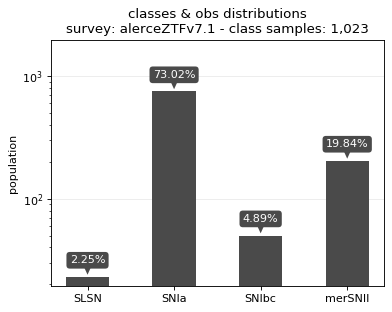

In [6]:
DF_INVALID_CLASSES = []
DF_SN_LIST = ['SLSN' ,'SNII', 'SNIIb', 'SNIIn', 'SNIa', 'SNIbc']

#mode = 'raw'
#mode = 'simple'
#mode = 'transients'
#mode = 'RRCeph'
mode = 'onlySNe'
#mode = 'onlySNIa'

if mode=='simple':
    invalid_classes = DF_INVALID_CLASSES
    query_classes = []
    to_merge_classes_dic = {'SN':DF_SN_LIST,}
    
elif mode=='onlySNe':
    kwargs = {
        'invalid_classes':[],
        'query_classes':DF_SN_LIST,
        'merge_classes_dict':{
            'merSNII':['SNII', 'SNIIb', 'SNIIn'],
        },
    }
    
elif mode=='onlySNIa':
    kwargs = {
        'invalid_classes':[],
        'query_classes':DF_SN_LIST,
        'merge_classes_dict':{
            'nonSNIa':['SLSN' ,'SNII', 'SNIIb', 'SNIIn', 'SNIbc'],
        },
    }

elif mode=='RRCeph':
    invalid_classes = DF_INVALID_CLASSES
    query_classes = ['RRL','Ceph']
    to_merge_classes_dic = {}

lcDictionaryCreator.update_labels_df(**kwargs)
lcDictionaryCreator.plot_class_distribution(figsize=(5,4), uses_log_scale=True)

In [7]:
%load_ext autoreload
%autoreload 2

description = 'ZTF Alerce'
save_folder = f'/home/opimentel/tesis/astro-lightcurves-handler/save/{survey_name}'
filename_extra_parameters = {
    'mode':mode,
}
kwargs = {
    'band_names':list(band_dictionary.keys()),
    #'to_export_bands':['g','r'],
    'filename_extra_parameters':filename_extra_parameters,
}
raw_lcdataset = lcDictionaryCreator.export_dictionary(description, save_folder, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
band_names: ['g', 'r']
cleaning the DataFrame - samples: 3,785,884
remove_invalid_bands > samples: 3,785,707
remove_invalid_classes > samples: 18,703
remove_negative_obs > samples: 18,703
save_filedir: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd
easy_label_dict: {'SLSN': 0, 'SNIa': 1, 'SNIbc': 2, 'merSNII': 3}
100%|██████████| 1023/1023 [219.82it/s, obj: ZTF18acbwtmf - y: 1 - c: SNIa - lengths_bdict: {'g': 1, 'r': 0} - correct_samples (any-band>=5): 765]       
> saving: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd


In [8]:
print(raw_lcdataset)

LCDataset(
(raw - samples 765)
 - samples: 765 - obs samples: 18,066 (g: 8,657 - r: 9,409)
 - max_length_serial: 427 - max_duration: 538.80[days] - median_cadence: {'g': 2.9943286997731775, 'r': 2.966782500036061}
   |▏       | SLSN - 16/765 (2.09%)
   |█████▊  | SNIa - 554/765 (72.42%)
   |▎       | SNIbc - 35/765 (4.58%)
   |█▋      | merSNII - 160/765 (20.92%)
)


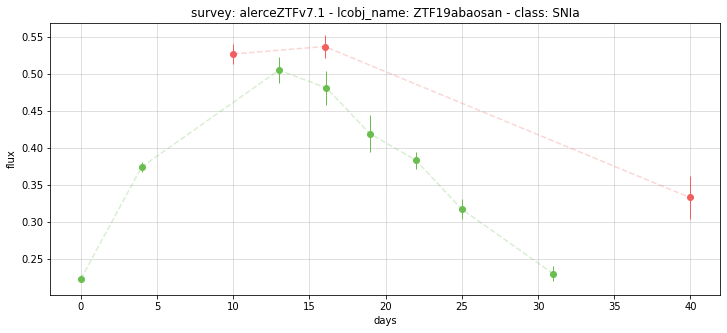

In [9]:
import flamingchoripan.lists as lists
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve

lcset = raw_lcdataset['raw']
lcobj, lcobj_name = lcset.get_random_lcobj()
#lcobj_name = 'ZTF18acdvvgx'; lcobj = lcset[lcobj_name]
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b)
ax.set_title(f'survey: {lcset.survey} - lcobj_name: {lcobj_name} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('flux')
ax.grid(alpha=0.5)